# Credit Risk Fundamentals

## Table of contents
1. What is Credit Risk?
2. Three Pillars of Credit Risk
3. About the German Credit Dataset
4. Loading German bank data and preprocessing
5. Exploratory Data Analysis (EDA)


## Part 1: What is Credit Risk?

### Real-World Context

Imagin you're working at a German bank in the 1990s. Every day, poeople come asking for loans:
- A worker wants 5,000 DM to by a used car
- A buisness owner needs 10,000 DM to expand their shop
- A student needs 2,000 DM for education

**The Big Question:** Will they pay you back?

**Credit Risk** is the risk that a borrower will not repay their loan. In banking:
- **Good Credit Risk**= Likely to pay $\to$ Approve the loan
- **Bad Credit Risk**= Likely to default $\to$ Reject or charge higher interest

### Why this Matters

Banks need to:
1. **Decide**: Should we lend to this persion?
2. **Price**: What interest rate should we charge?
3. **Manage**: How much total risk are we taking?
4. **Reserve**: How much money should we set aside for losses?

**Real Impact**:
- Bad lending decisons $\to$ Bank losses $\to$ Potential bankruptcy
- The 2008 financial crisis was largely caused by poor credit risk management
- Basel regulations require banks to measure and manage credit risk

## Part 2: The Three Pillars of Credit Risk

Credit risk has **three components**.

### 1. PD(Probability of Default)
**Definition**: What is the chance this borrower will default?

**Example**:
- If PD =5%, there's a 5% chance the borrower won't pay back
- Out of 100 similar borrowers, we expect 5 to default

**Range**: 0% to 100%
- 0% = Absolutely certain they'll pay
- 100% = Absolutely certain they won't pay

**Typical Values:**
- Prime borrower (excellent credit): 0.5%-2%
- Standard borrower: 5%-10%
- Subprime borrower: 15%-30%
- High-risk: 30%+

**What affects PD?**
- Employment status
- Checking account balance
- Credit history
- Purpose of loan
- Age and experience


### 2. LGD(Loss Given Default)
**Definition**: If default happens, what percentage of the loan do we loss?

**Example:**
- Loan amount: 10,000 DM
- Borrower defaults
- We sell their car (collateral) and recover 4,000 DM
- Loss = 6,000 DM
- LGD = 6,000/10,000  = 60%

**Range**: 0% to 100%
- 0% = We recover everything
- 100% = We recover nothing

**Typical Values**:
- Secured loans (cars, house): 20%-40%
- Unsecured personal loans: 60%-80%
- Credit cards: 70%-90%

**What Affects LGD?**
- Collateral quality (real estate vs no collateral)
- Property owned by borrower
- Other guarantors/co-signers
- Economic conditions during default

**Related Concept**:
- Recovery Rate = 1-LGD
- If LGD = 60%, then Recovery Rat=40%

### 3. EAD (Exposure at Default)
**Definition**: How much money is at risk when default happens?

**For Term Loans:**
- Borrowed 10,000 DM
- Paid back 3,000 DM
- Defaults
- EAD = 7,000 DM (remaining balance)

### Putting it Together: Expected Loss
The **Expected Loss(EL)** formula combines all three:
$$\boxed{EL = PD \times LGD \times EAD}$$
**Detailed Example:**

Suppose we're evaluating a loan:
- **EAD** = 10,000 DM (loan amount)
- **PD** = 8% (8% chance of default)
- **LGD** = 65% (expect to lose 65% if default occurs)

**Calculation:**
```
EL = 0.08 × 0.65 × 10,000 DM
EL = 520 DM
```

**Interpretation:**
- On average, we expect to lose 520 DM on this loan
- We should charge at least 520 DM in interest to break even on risk
- Plus additional interest for profit and operational costs

**Scenario Comparison:**

| Borrower Type | PD | LGD | EAD | Expected Loss |
|---------------|-----|-----|---------|---------------|
| Excellent (employed, savings) | 2% | 40% | 10,000 DM | 80 DM |
| Average | 8% | 65% | 10,000 DM | 520 DM |
| Poor (unemployed, no savings) | 25% | 85% | 10,000 DM | 2,125 DM |

**Key Insight:** Same loan amount, but vastly different risk!

## Part 3: About the German Credit Dataset

### Dataset Background

This dataset contains **real credit data** from a German bank:
- **Time Period:** 1994
- **Number of Loans:** 1,000 applications
- **Classification:** 700 Good credit, 300 Bad credit
- **Source:** UCI Machine Learning Repository
- **Industry Use:** Standard benchmark for credit scoring models

### Variables in the Dataset

**1. Checking Account Status**

**2. Duration (months)**

**3. Credit History**

**4. Purpose**

**5. Credit Amount (DM)**

**6. Savings Account Balance**

**7. Employment Duration**

**8. Installment Rate**

**9. Personal Status and Sex**

**10. Other Debtors / Guarantors**

**11. Residence Duration**

**12. Property**

**13. Age**

**14. Other Intallment Plans**

**15. Housing**

**16. Number of Existing Credits**

**17. Job**

**18. Number of Dependents**

**19. Telephone**

**20. Foreign Worker**

## Setup: Installing and Importing Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 100)

## Loading the German Credit Dataset

In [3]:
# Load German Credit Data
# URL: https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data

# Column names based on german.doc file
column_names = [
    'checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount',
    'savings_status', 'employment', 'installment_rate', 'personal_status',
    'other_parties', 'residence_since', 'property_magnitude', 'age',
    'other_payment_plans', 'housing', 'existing_credits', 'job',
    'num_dependents', 'own_telephone', 'foreign_worker', 'class'
]
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
data = pd.read_csv(url, sep=' ', header=None, names=column_names)
print("Data loaded successfully.")


Data loaded successfully.


## Data Preprocessing: Making Data Human-Readable

The original dataset uses codes (A11, A12, etc.). Let's convert these to meaningful labels.

In [4]:
# Create a copy for processing
df = data.copy()

# 1. Checking Account Status
checking_map = {
    'A11': '< 0 DM',
    'A12': '0 - 200 DM',
    'A13': '>= 200 DM',
    'A14': 'No checking account'
}
df['checking_status'] = df['checking_status'].map(checking_map)

# 2. Credit History
history_map = {
    'A30': 'No credits / All paid',
    'A31': 'All paid this bank',
    'A32': 'Existing paid',
    'A33': 'Delay in past',
    'A34': 'Critical account'
}
df['credit_history'] = df['credit_history'].map(history_map)

# 3. Purpose
purpose_map = {
    'A40': 'Car (new)',
    'A41': 'Car (used)',
    'A42': 'Furniture/Equipment',
    'A43': 'Radio/TV',
    'A44': 'Domestic appliances',
    'A45': 'Repairs',
    'A46': 'Education',
    'A47': 'Vacation',
    'A48': 'Retraining',
    'A49': 'Business',
    'A410': 'Others'
}
df['purpose'] = df['purpose'].map(purpose_map)

# 4. Savings Account
savings_map = {
    'A61': '< 100 DM',
    'A62': '100 - 500 DM',
    'A63': '500 - 1000 DM',
    'A64': '>= 1000 DM',
    'A65': 'Unknown / No savings'
}
df['savings_status'] = df['savings_status'].map(savings_map)

# 5. Employment
employment_map = {
    'A71': 'Unemployed',
    'A72': '< 1 year',
    'A73': '1 - 4 years',
    'A74': '4 - 7 years',
    'A75': '>= 7 years'
}
df['employment'] = df['employment'].map(employment_map)

# 6. Personal Status
personal_map = {
    'A91': 'Male : Divorced/Separated',
    'A92': 'Female : Divorced/Separated/Married',
    'A93': 'Male : Single',
    'A94': 'Male : Married/Widowed'
}
df['personal_status'] = df['personal_status'].map(personal_map)

# 7. Other Parties
parties_map = {
    'A101': 'None',
    'A102': 'Co-applicant',
    'A103': 'Guarantor'
}
df['other_parties'] = df['other_parties'].map(parties_map)

# 8. Property
property_map = {
    'A121': 'Real estate',
    'A122': 'Building society savings / Life insurance',
    'A123': 'Car or other',
    'A124': 'Unknown / No property'
}
df['property_magnitude'] = df['property_magnitude'].map(property_map)

# 9. Other Payment Plans
plans_map = {
    'A141': 'Bank',
    'A142': 'Stores',
    'A143': 'None'
}
df['other_payment_plans'] = df['other_payment_plans'].map(plans_map)

# 10. Housing
housing_map = {
    'A151': 'Rent',
    'A152': 'Own',
    'A153': 'Free'
}
df['housing'] = df['housing'].map(housing_map)

# 11. Job
job_map = {
    'A171': 'Unemployed / Unskilled - non-resident',
    'A172': 'Unskilled - resident',
    'A173': 'Skilled employee',
    'A174': 'Management / Highly qualified'
}
df['job'] = df['job'].map(job_map)

# 12. Telephone
phone_map = {
    'A191': 'No',
    'A192': 'Yes'
}
df['own_telephone'] = df['own_telephone'].map(phone_map)

# 13. Foreign Worker
foreign_map = {
    'A201': 'Yes',
    'A202': 'No'
}
df['foreign_worker'] = df['foreign_worker'].map(foreign_map)

# 14. Target Variable (Most Important!)
# Original: 1 = Good, 2 = Bad
# We'll convert to: 0 = Good, 1 = Bad (standard for binary classification)
df['default'] = (df['class'] == 2).astype(int)
df = df.drop('class', axis=1)

In [5]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_rate,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,default
0,< 0 DM,6,Critical account,Radio/TV,1169,Unknown / No savings,>= 7 years,4,Male : Single,None,4,Real estate,67,None,Own,2,Skilled employee,1,Yes,Yes,0
1,0 - 200 DM,48,Existing paid,Radio/TV,5951,< 100 DM,1 - 4 years,2,Female : Divorced/Separated/Married,None,2,Real estate,22,None,Own,1,Skilled employee,1,No,Yes,1
2,No checking account,12,Critical account,Education,2096,< 100 DM,4 - 7 years,2,Male : Single,None,3,Real estate,49,None,Own,1,Unskilled - resident,2,No,Yes,0
3,< 0 DM,42,Existing paid,Furniture/Equipment,7882,< 100 DM,4 - 7 years,2,Male : Single,Guarantor,4,Building society savings / Life insurance,45,None,Free,1,Skilled employee,2,No,Yes,0
4,< 0 DM,24,Delay in past,Car (new),4870,< 100 DM,1 - 4 years,3,Male : Single,None,4,Unknown / No property,53,None,Free,2,Skilled employee,2,No,Yes,1


In [6]:
len(df)

1000

In [8]:
len(df.columns)-1

20

In [7]:
df.dtypes

checking_status        object
duration                int64
credit_history         object
purpose                object
credit_amount           int64
savings_status         object
employment             object
installment_rate        int64
personal_status        object
other_parties          object
residence_since         int64
property_magnitude     object
age                     int64
other_payment_plans    object
housing                object
existing_credits        int64
job                    object
num_dependents          int64
own_telephone          object
foreign_worker         object
default                 int64
dtype: object

## Exploratory Data Analysis (EDA)


### Step 1: Missing Values Check

In [9]:
df.isnull().sum().sort_values(ascending=False)

checking_status        0
duration               0
credit_history         0
purpose                0
credit_amount          0
savings_status         0
employment             0
installment_rate       0
personal_status        0
other_parties          0
residence_since        0
property_magnitude     0
age                    0
other_payment_plans    0
housing                0
existing_credits       0
job                    0
num_dependents         0
own_telephone          0
foreign_worker         0
default                0
dtype: int64

### Step 2: Understanding Default Rate

In [10]:
#deafault rate
n_good = (df['default'] == 0).sum()
n_bad = (df['default'] == 1).sum()
bad_rate = df['default'].mean()
print(f"Good credits: {n_good}, Bad credits: {n_bad}, Bad rate: {bad_rate:.2%}")

Good credits: 700, Bad credits: 300, Bad rate: 30.00%


### Business Interpretation

- Out of every 100 loan application, approximately 30 will default.

- This 30.0% default rate means:
    - For every 1,000,000 DM lent, we expect 300,000 DM in defaults (before recovery)
    - We need to price loans to cover this expected loss
    - We need to indentify which borrowers are likely to be in that 30.0%

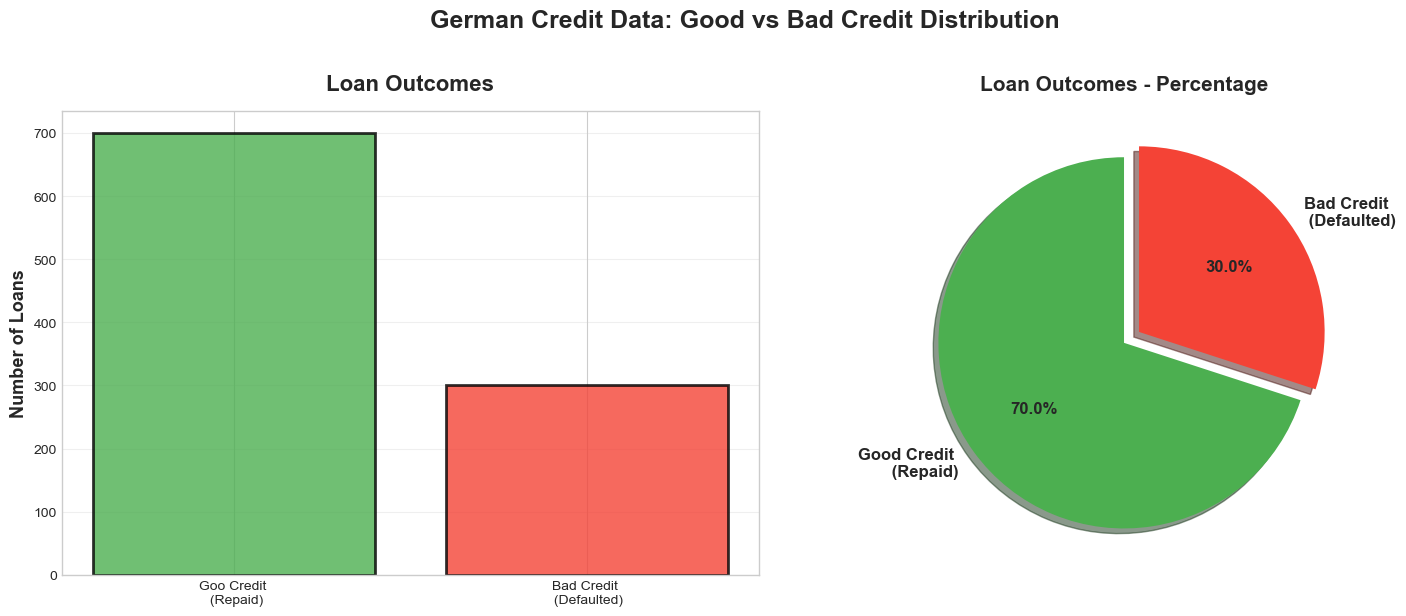

In [16]:
# Visualize the distribution

fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(15,6))

# Count plot
counts = df['default'].value_counts()
colors = ['#4CAF50', '#F44336']
bars = ax1.bar(['Goo Credit \n (Repaid)', 'Bad Credit \n (Defaulted)'], 
               counts.values, color=colors, alpha =0.8, edgecolor ='black', linewidth =2)
ax1.set_ylabel('Number of Loans', fontsize =13, fontweight = 'bold')
ax1.set_title('Loan Outcomes', fontsize =16, fontweight ='bold', pad=15)
ax1.grid(True, alpha =0.3, axis ='y')

# Pie chart
explode =(0, 0.1)
ax2.pie(counts.values, labels=['Good Credit \n (Repaid)', 'Bad Credit \n (Defaulted)'],
        autopct='%1.1f%%', colors = colors, explode= explode, shadow =True,
        startangle =90, textprops ={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('Loan Outcomes - Percentage', fontsize =15, fontweight ='bold', pad =15)

plt.suptitle('German Credit Data: Good vs Bad Credit Distribution', fontsize =18, fontweight ='bold', y =1.02)
plt.tight_layout()
plt.show()

### What This Means for Modeling:
- Class imbalance: 70.0% vs 30.0%
- Not severely imbalanced
- Still need to be careful
- Will use appropriate metrics (AUC, not just accuracy or, weighted accuracy)

### Step 4: Analyzing Numerical Variables

In [17]:
# Identify numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('default')

for i, col in enumerate(num_cols, 1):
    print(f"{i}. {col}")

1. duration
2. credit_amount
3. installment_rate
4. residence_since
5. age
6. existing_credits
7. num_dependents


In [18]:
df[num_cols].describe().round(2)

,duration,credit_amount,installment_rate,residence_since,age,existing_credits,num_dependents
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,20.90,3271.26,2.97,2.84,35.55,1.41,1.16
std,12.06,2822.74,1.12,1.10,11.38,0.58,0.36
min,4.00,250.00,1.00,1.00,19.00,1.00,1.00
25%,12.00,1365.50,2.00,2.00,27.00,1.00,1.00
50%,18.00,2319.50,3.00,3.00,33.00,1.00,1.00
75%,24.00,3972.25,4.00,4.00,42.00,2.00,1.00
max,72.00,18424.00,4.00,4.00,75.00,4.00,2.00


We can visualize these data

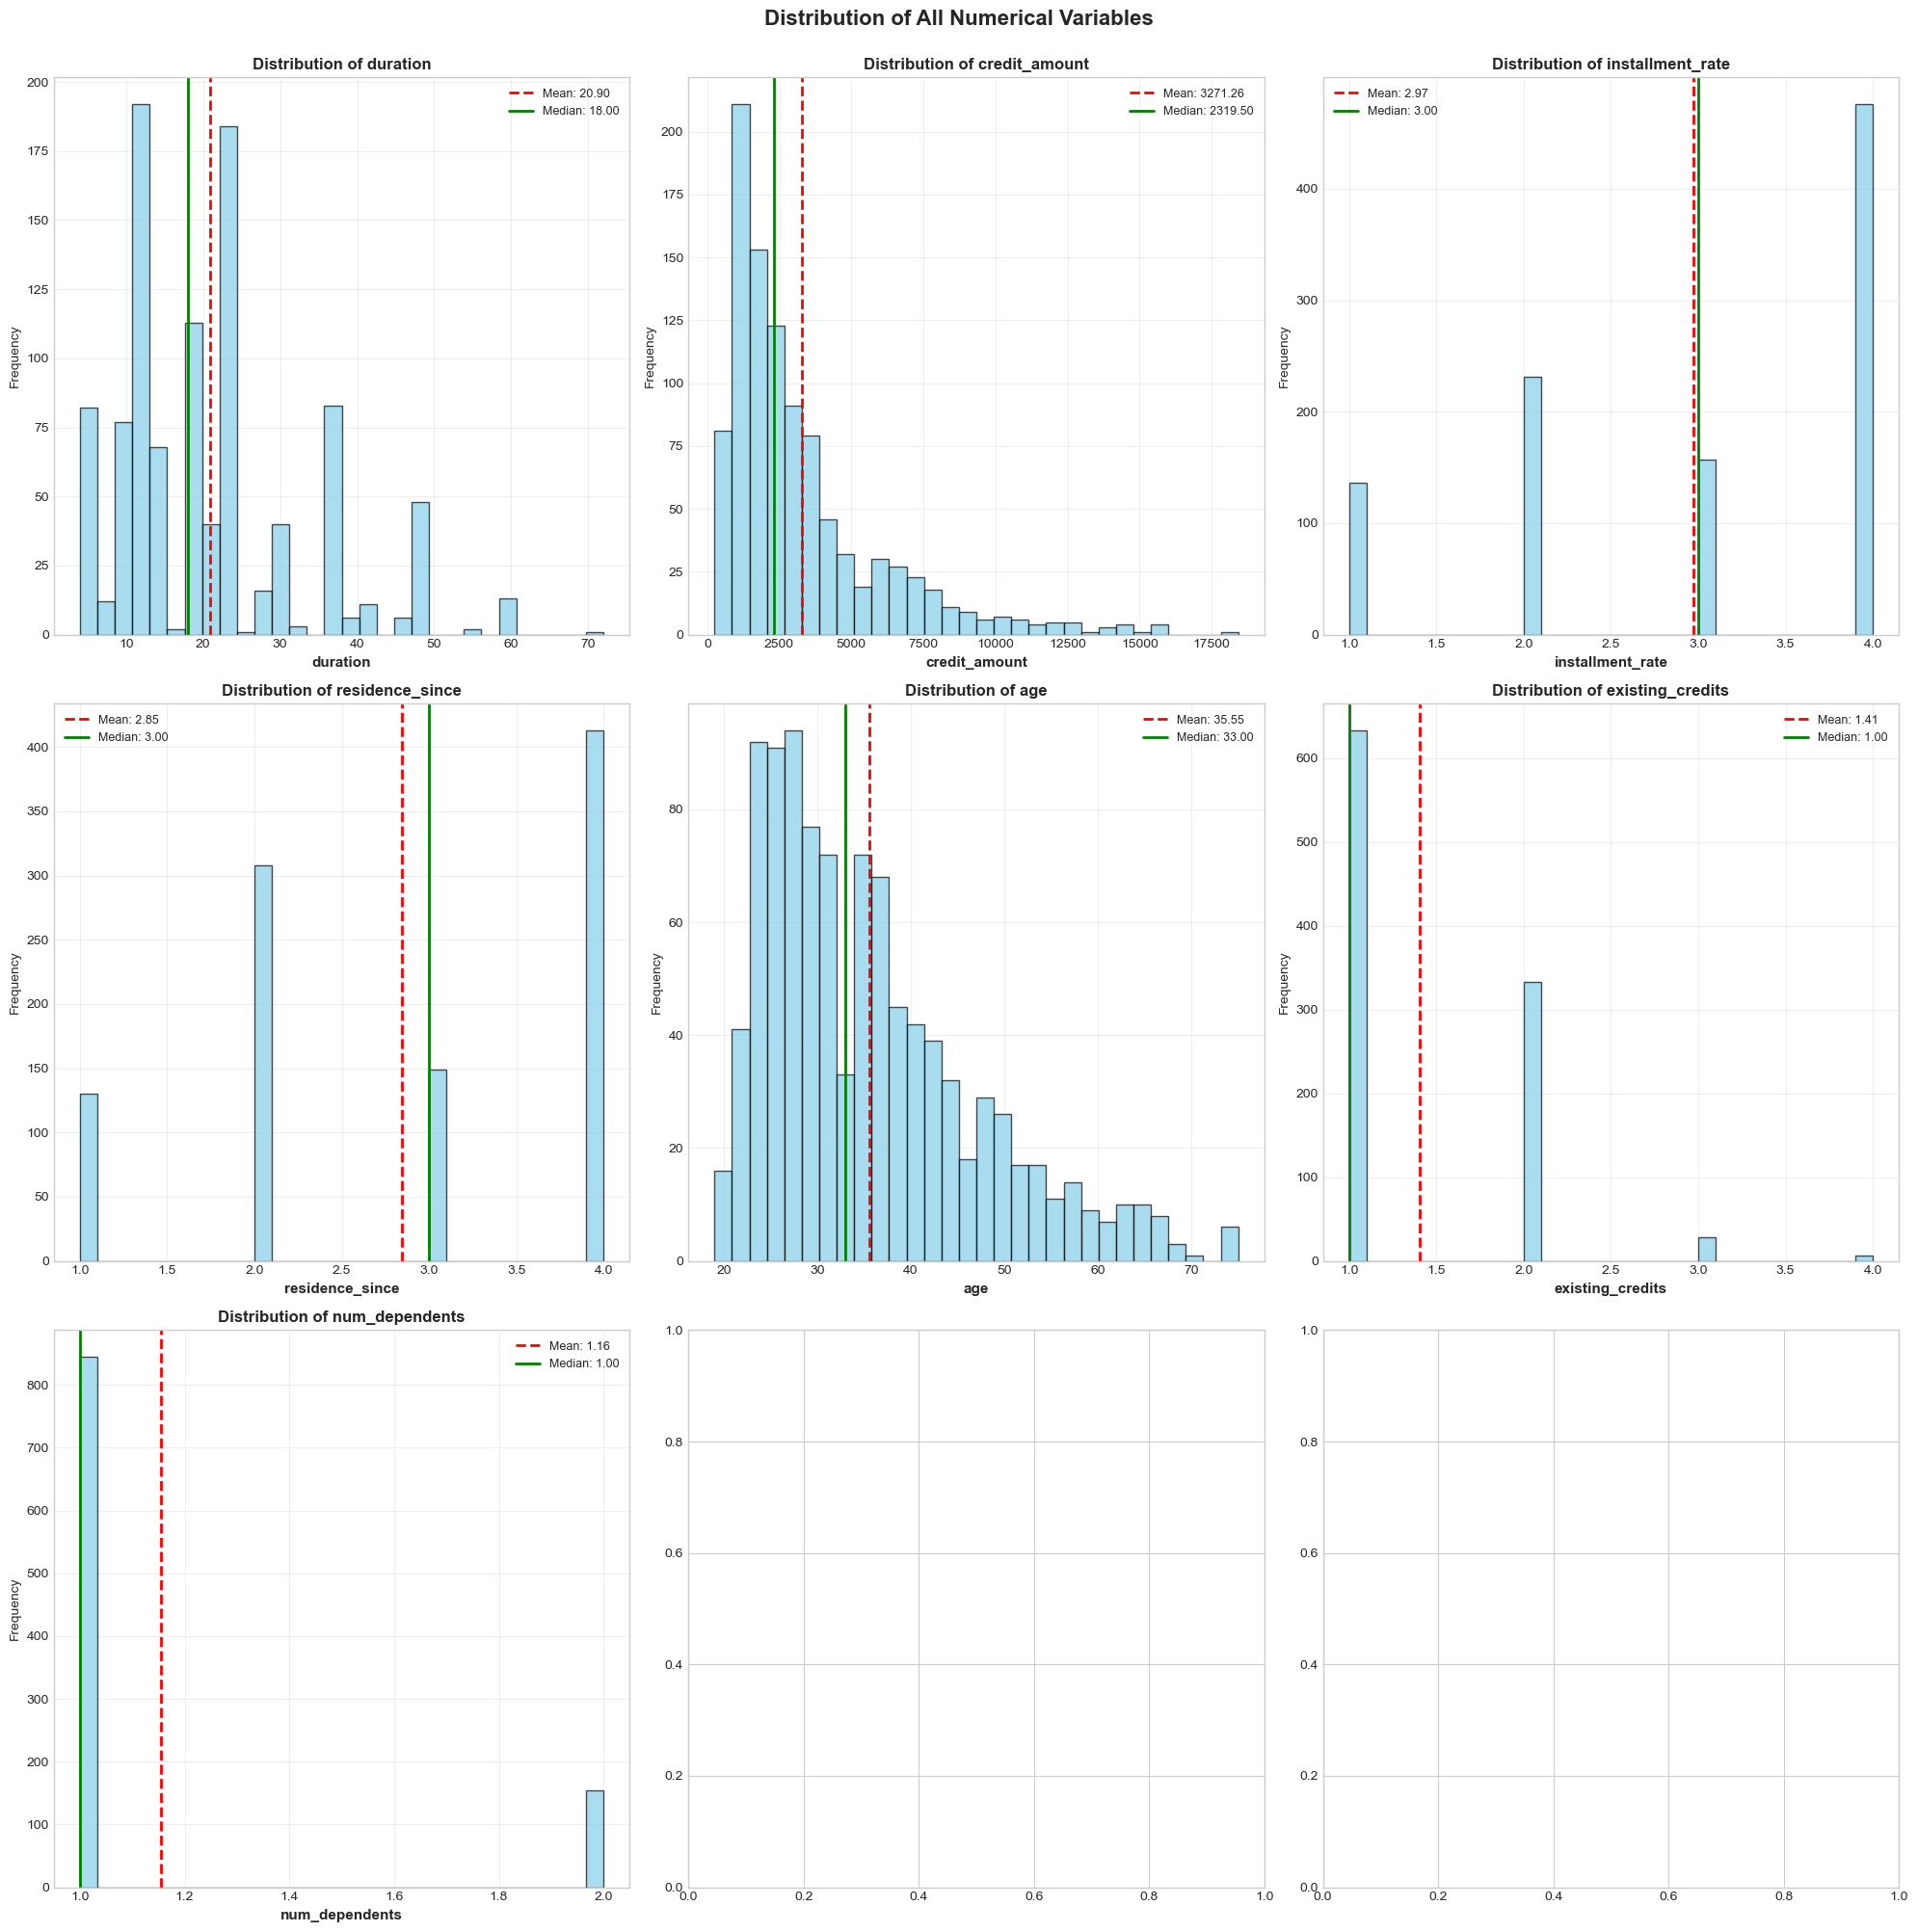

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.ravel()

for idx, col in enumerate(num_cols):
    ax = axes[idx]

    df[col].hist(bins =30, ax =ax, color ='skyblue', edgecolor ='black', alpha =0.7)

    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()

    ax.axvline(mean_val, color ='red', linestyle ='--', linewidth =2, label =f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color ='green', linestyle ='-', linewidth =2, label =f'Median: {median_val:.2f}')

    ax.set_xlabel(col, fontsize =11, fontweight ='bold')
    ax.set_ylabel('Frequency', fontsize =10)
    ax.set_title(f'Distribution of {col}', fontsize =12, fontweight ='bold')
    ax.legend(fontsize =9)
    ax.grid(True, alpha =0.3)

plt.suptitle('Distribution of All Numerical Variables',
              fontsize =16, fontweight ='bold', y =1.00)
plt.tight_layout()
plt.show()

### Step 4: Analyzing Categorical Variables

In [22]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

for i, col in enumerate(cat_cols, 1):
    print(f"{i}. {col}")

1. checking_status
2. credit_history
3. purpose
4. savings_status
5. employment
6. personal_status
7. other_parties
8. property_magnitude
9. other_payment_plans
10. housing
11. job
12. own_telephone
13. foreign_worker


In [24]:
for col in cat_cols:
    print(f"\n{'='*100}")
    print(f"{col.upper().replace('_', ' ')}")
    print(f"{'='*100}")
    
    # Calculate default rate by category
    analysis = df.groupby(col).agg({
        'default': ['count', 'sum', 'mean']
    }).round(3)
    
    analysis.columns = ['Count', 'Num_Defaults', 'Default_Rate']
    analysis['Default_Rate_Pct'] = (analysis['Default_Rate'] * 100).round(1)
    analysis = analysis.sort_values('Default_Rate', ascending=False)
    
    print(analysis.to_string())
    
    # Find riskiest category
    riskiest = analysis.index[0]
    riskiest_rate = analysis.iloc[0]['Default_Rate_Pct']
    safest = analysis.index[-1]
    safest_rate = analysis.iloc[-1]['Default_Rate_Pct']
    
    print(f"\n Highest Risk: '{riskiest}' with {riskiest_rate:.1f}% default rate")
    print(f" Lowest Risk: '{safest}' with {safest_rate:.1f}% default rate")
    print(f" Risk Spread: {riskiest_rate - safest_rate:.1f} percentage points difference")


CHECKING STATUS
                     Count  Num_Defaults  Default_Rate  Default_Rate_Pct
checking_status                                                         
< 0 DM                 274           135         0.493              49.3
0 - 200 DM             269           105         0.390              39.0
>= 200 DM               63            14         0.222              22.2
No checking account    394            46         0.117              11.7

 Highest Risk: '< 0 DM' with 49.3% default rate
 Lowest Risk: 'No checking account' with 11.7% default rate
 Risk Spread: 37.6 percentage points difference

CREDIT HISTORY
                       Count  Num_Defaults  Default_Rate  Default_Rate_Pct
credit_history                                                            
No credits / All paid     40            25         0.625              62.5
All paid this bank        49            28         0.571              57.1
Existing paid            530           169         0.319              31

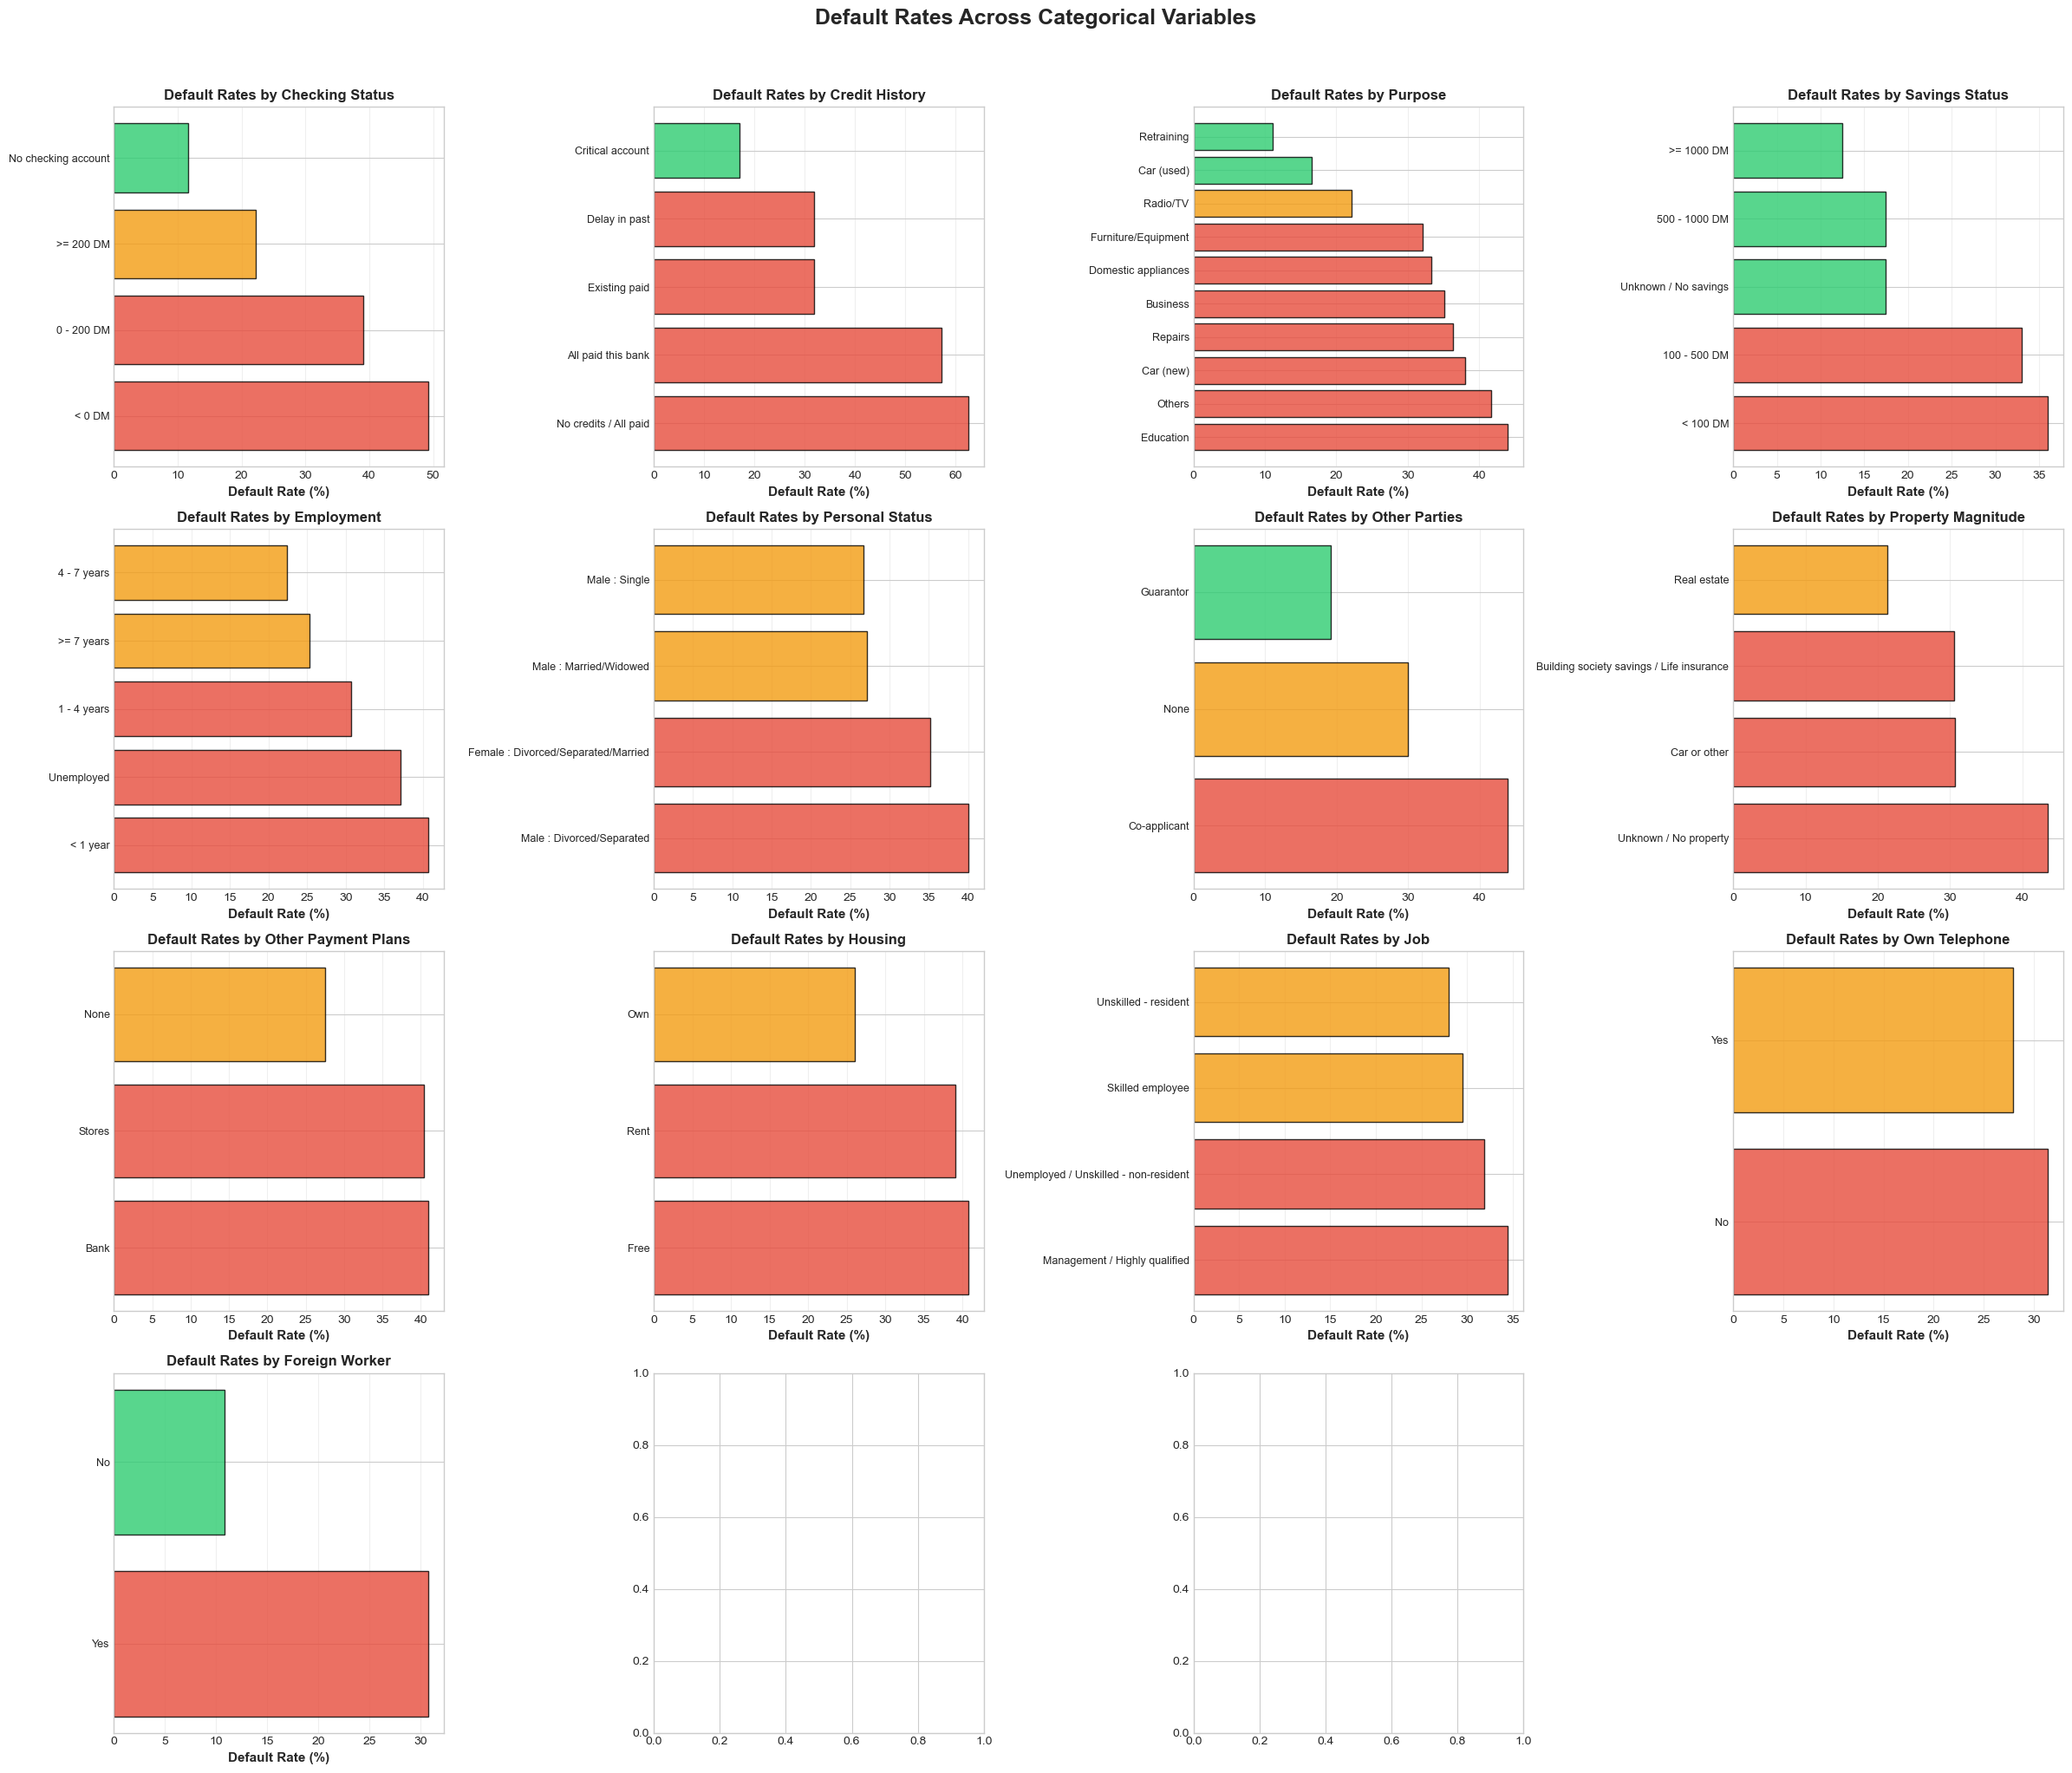

In [ ]:
# Visualize default rates for categorical variables
fig, axes = plt.subplots(4, 4, figsize=(24, 20))
axes = axes.ravel()

for idx, col in enumerate(cat_cols):
    ax = axes[idx]

    # Calculate default rate by category
    default_rates = df.groupby(col)['default'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    default_rates['mean'] = default_rates['mean'] * 100  # Convert to percentage

    # Create bar plot
    colors = ['#e74c3c' if x >30 else '#f39c12' if x > 20 else '#2ecc71' for x in default_rates['mean']]

    bars = ax.barh(range(len(default_rates)), default_rates['mean'], 
                   color=colors, alpha=0.8, edgecolor='black')
    ax.set_yticks(range(len(default_rates)))
    ax.set_yticklabels(default_rates.index, fontsize =9)
    ax.set_xlabel('Default Rate (%)', fontsize =11, fontweight ='bold')
    ax.set_title(f'Default Rates by {col.replace("_", " ").title()}', fontsize =12, fontweight ='bold')
    ax.grid(True, alpha =0.3, axis ='x')

plt.suptitle('Default Rates Across Categorical Variables',
              fontsize =18, fontweight ='bold', y =1.02)
plt.tight_layout()
plt.show()

### Step 5: Risk Score

In [54]:
import pandas as pd

high_risk_list = []

cols = [c for c in df.columns if c != 'default' and df[c].dtype == 'object']

for col in cols:
    rates = df.groupby(col)['default'].mean() * 100
    
    target_cats = rates[rates >= 30]
    
    for category, rate in target_cats.items():
        high_risk_list.append({
            'Column': col,
            'Category': category,
            'Default_Rate': rate
        })

risk_df = pd.DataFrame(high_risk_list)

if not risk_df.empty:
    risk_df = risk_df.sort_values(by='Default_Rate', ascending=False).reset_index(drop=True)
print("=" * 100)
print("Top 10 High-Risk Categories (Default Rate >= 30%)")
print(risk_df.head(10))
print("=" * 100)

Top 10 High-Risk Categories (Default Rate >= 30%)
                Column               Category  Default_Rate
0       credit_history  No credits / All paid     62.500000
1       credit_history     All paid this bank     57.142857
2      checking_status                 < 0 DM     49.270073
3              purpose              Education     44.000000
4        other_parties           Co-applicant     43.902439
5   property_magnitude  Unknown / No property     43.506494
6              purpose                 Others     41.666667
7  other_payment_plans                   Bank     41.007194
8              housing                   Free     40.740741
9           employment               < 1 year     40.697674


In [57]:
import pandas as pd

risk_summary = []

num_cols = [c for c in df.columns if c != 'default' and df[c].dtype != 'object']

for col in num_cols:
    try:
        binned_col = pd.qcut(df[col], q=4, duplicates='drop')
        stats = df.groupby(binned_col)['default'].mean() * 100
        
    except Exception:
        stats = df.groupby(col)['default'].mean() * 100

    high_risk_stats = stats[stats >= 30]

    for segment, rate in high_risk_stats.items():
        risk_summary.append({
            'Column': col,
            'Segment': str(segment),  
            'Default_Rate': rate
        })

numeric_risk_df = pd.DataFrame(risk_summary)

if not numeric_risk_df.empty:
    numeric_risk_df = numeric_risk_df.sort_values(by='Default_Rate', ascending=False).reset_index(drop=True)

print("=" * 100)
print("Top 10 High-Risk Numeric Segments (Default Rate >= 30%)")
print(numeric_risk_df)
print("=" * 100)

Top 10 High-Risk Numeric Segments (Default Rate >= 30%)
             Column             Segment  Default_Rate
0          duration        (24.0, 72.0]     44.347826
1     credit_amount  (3972.25, 18424.0]     42.000000
2               age      (18.999, 27.0]     36.769759
3  installment_rate          (3.0, 4.0]     33.403361
4               age        (27.0, 33.0]     32.888889
5     credit_amount   (249.999, 1365.5]     30.800000
6   residence_since        (0.999, 2.0]     30.365297
7  existing_credits        (0.999, 2.0]     30.227743
8   residence_since          (3.0, 4.0]     30.024213
9    num_dependents        (0.999, 2.0]     30.000000
